# Calculation of FMR and FNM


In [12]:
# Use numpy to do the operations on vectors and matrices
import numpy as np

# Use pandas and matplotlib for the visualization
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Initialize Initial values as provided by in the spreadsheet
similarity = np.array([ 0.357895150227523,  0.473518915217542,   0.0599504565670546,   0.0887410791564728,   0.0756922701446284,   0.722029125869383,    0.073967257324095,     0.319232006160412,  0.228291996127948,   0.296500305530314,    0.0304837460453645,    0.6564002679605,   0.290762386182204,    0.48675312969213])

truth = np.array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1])

print("similarity:", similarity)
print("truth:", truth)

truth = truth[:, np.newaxis]
similarity = similarity[:, np.newaxis] # transform it to a column vector for easier calculations

similarity: [0.35789515 0.47351892 0.05995046 0.08874108 0.07569227 0.72202913
 0.07396726 0.31923201 0.228292   0.29650031 0.03048375 0.65640027
 0.29076239 0.48675313]
truth: [1 0 0 0 0 1 1 1 1 1 0 0 0 1]


In [14]:
thresholds = np.linspace(0.1, 1,num=10)
print("thresholds: ", thresholds)

thresholds_matrix = np.ones((len(similarity), len(thresholds))) * thresholds

predictions = (similarity > thresholds_matrix) + 0 # so we convert to numbers
print(predictions)

thresholds:  [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[[1 1 1 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0]]


In [15]:
predicted_not_authorized = predictions.sum(axis=0)
predicted_authorized = (1-predictions).sum(axis=0)
print("predicted_not_authorized: ", predicted_not_authorized)
print("predicted_authorized: ", predicted_authorized)

attempts_of_real_authorized_users = sum(truth)
attempts_of_real_not_authorized_users = sum(1-truth)
print("attempts_of_real_authorized_users:", attempts_of_real_authorized_users)
print("attempts_of_real_not_authorized_users:", attempts_of_real_not_authorized_users)


predicted_not_authorized:  [9 9 6 4 2 2 1 0 0 0]
predicted_authorized:  [ 5  5  8 10 12 12 13 14 14 14]
attempts_of_real_authorized_users: [7]
attempts_of_real_not_authorized_users: [7]


In [16]:
false_positive = (np.logical_and(predictions != truth, truth == 0)) + 0
print(false_positive)
FMR = false_positive.sum(axis=0) / attempts_of_real_authorized_users
print(FMR)

[[0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
[0.42857143 0.42857143 0.28571429 0.28571429 0.14285714 0.14285714
 0.         0.         0.         0.        ]


In [17]:
false_negatives = (np.logical_and(predictions != truth, truth == 1)) + 0
print(false_negatives)
FNMR = false_negatives.sum(axis=0) / attempts_of_real_not_authorized_users
print(FNMR)

[[0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [0 0 0 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1]]
[0.14285714 0.14285714 0.42857143 0.71428571 0.85714286 0.85714286
 0.85714286 1.         1.         1.        ]


In [18]:
ratios_by_thresholds = pd.DataFrame(
    {
        "thresholds": thresholds,
        "FNMR": FNMR,
        "FMR": FMR
    }
)
ratios_by_thresholds

,thresholds,FNMR,FMR
0,0.1,0.142857,0.428571
1,0.2,0.142857,0.428571
2,0.3,0.428571,0.285714
3,0.4,0.714286,0.285714
4,0.5,0.857143,0.142857
5,0.6,0.857143,0.142857
6,0.7,0.857143,0.000000
7,0.8,1.000000,0.000000
8,0.9,1.000000,0.000000
9,1.0,1.000000,0.000000


<Axes: xlabel='thresholds'>

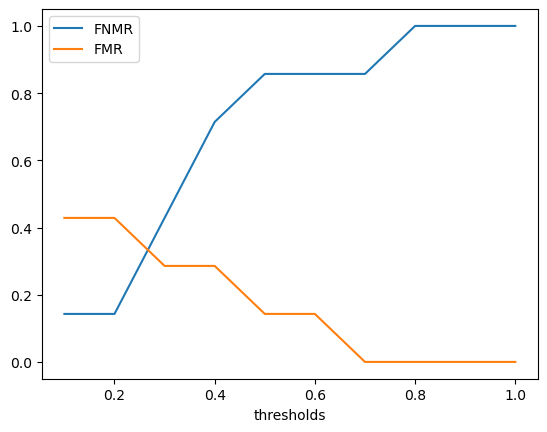

In [19]:
ratios_by_thresholds.plot(x=0)